### Problem Statement


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car


In [1]:
# Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading required files
carPrice = pd.read_csv(r'CarPrice_Assignment.csv')
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Inspecting the aspect of data

In [3]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### <font color = violet> Insights: 
    - No Null /  Nan objects present

In [4]:
carPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleaning and Manipulation

In [5]:
# find columns which does not have predictive power
print("Number of Columns with same value in all the rows: ",carPrice.loc[:,carPrice.nunique()==1].columns.size)

# find duplicate rows
print("Number of duplicate rows: ",carPrice.loc[carPrice.duplicated(keep = 'first')].shape[0])

Number of Columns with same value in all the rows:  0
Number of duplicate rows:  0


In [6]:
# Split car name from CarName column
carPrice['CompanyName'] = carPrice.CarName.str.split(' ').str[0]

#since we have drived columns(Both will give the same meaning), drop the CarName column
carPrice = carPrice.drop(['CarName','car_ID'],axis = 1)

# Visualising the Data
## Univariate Analysis
- Categorical Variables

In [7]:
# User Defined Functions

def categorical_barPlot(df, columns):
    '''Bar plot for Categorical Values'''
    
    plt.figure(figsize=(17, 4))
    plt.subplot(1,3,1)
    sns.countplot(x= columns[0], data = df,order =  df[columns[0]].value_counts().index)
    plt.subplot(1,3,2)
    sns.countplot(x= columns[1], data = df,order =  df[columns[1]].value_counts().index)
    plt.subplot(1,3,3)
    sns.countplot(x= columns[2], data = df,order =  df[columns[2]].value_counts().index)
    plt.show()
    
def quantitative_boxplot(df,columns, diff = None):
    '''boxplot for quantitative Variables'''
    fig, ax = plt.subplots(figsize=(17,4))
    fig.suptitle("Spread and central Tendency of the Variable")
    plt.subplot(1,3,1)
    sns.boxplot(data =df, y=columns[0], x=diff)
    plt.subplot(1,3,2)
    sns.boxplot(data =df, y =columns[1], x=diff)
    plt.subplot(1,3,3)
    sns.boxplot(data =df, y=columns[2], x=diff)
    plt.show()
    
def bi_ScatterPlot(df,columns):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.scatterplot(x= columns[0],y='price', data = df)
    plt.subplot(1,3,2)
    sns.scatterplot(x= columns[1],y='price', data = df)
    plt.subplot(1,3,3)
    sns.scatterplot(x= columns[2],y='price', data = df)
    plt.show()

def bi_categorical_barPlot(df,columns):
    plt.figure(figsize=(30, 5))
    plt.subplot(1,3,1)
    sns.barplot(x= columns[0],y='price', data = df,order =  df[columns[0]].value_counts().index)
    plt.subplot(1,3,2)
    sns.barplot(x= columns[1],y='price', data = df,order =  df[columns[1]].value_counts().index)
    plt.subplot(1,3,3)
    sns.barplot(x= columns[2],y='price', data = df,order =  df[columns[2]].value_counts().index)
    plt.show()

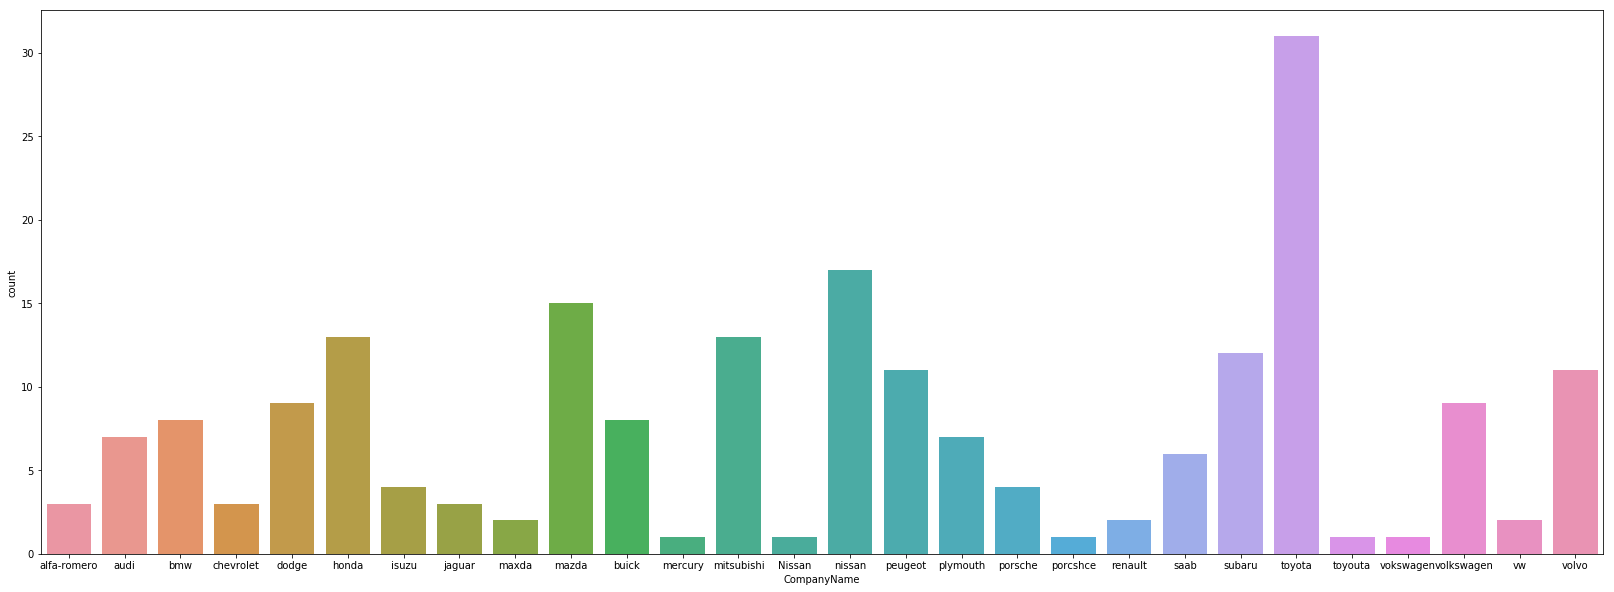

In [8]:
# CompanyName
plt.figure(figsize = (28,10))
sns.countplot(x= 'CompanyName', data = carPrice)
plt.show()

### <font color = violet> Insights:
    - CaseSensitive 
    - Spelling errors
    - Abbrevations
 <font color = red>- These errors needs to be resloved </font>

In [9]:
# Updating case insensitive
carPrice['CompanyName'] = carPrice.CompanyName.str.lower()

# Fixing the spelling errors in CarName Column
carPrice['CompanyName']  = carPrice['CompanyName'].replace({'toyouta' : 'toyota','vokswagen' : 'volkswagen','vw' : 'volkswagen',
                                                'maxda' : 'mazda', 'porcshce':'porsche' })

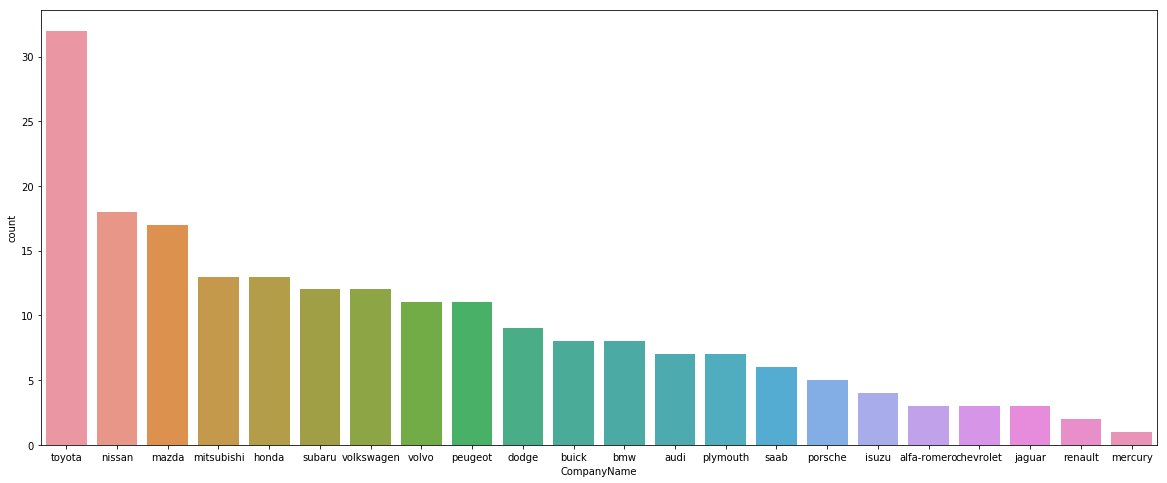

In [10]:
plt.figure(figsize = (20,8))
sns.countplot(x= 'CompanyName', data = carPrice , order = carPrice.CompanyName.value_counts().index)
plt.show()

### <font color = violet> Insights:
- More people tend to have toyota cars

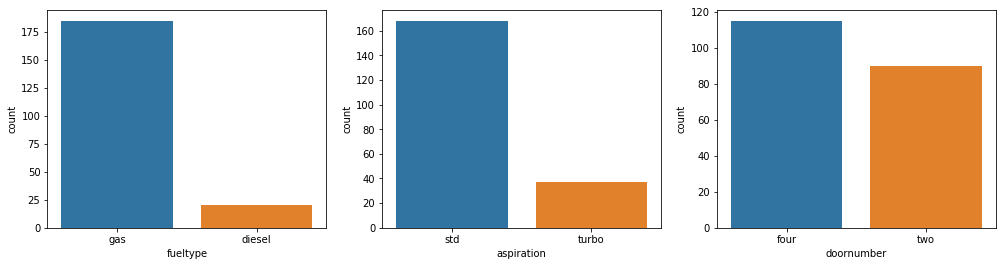

In [11]:
categorical_barPlot(carPrice, ['fueltype','aspiration','doornumber'])

### <font color = violet> Insights:
Most of the cars has
    - FuleType: Gas 
    - Aspiration: STD
    - Number of Doors: 4
 </font>

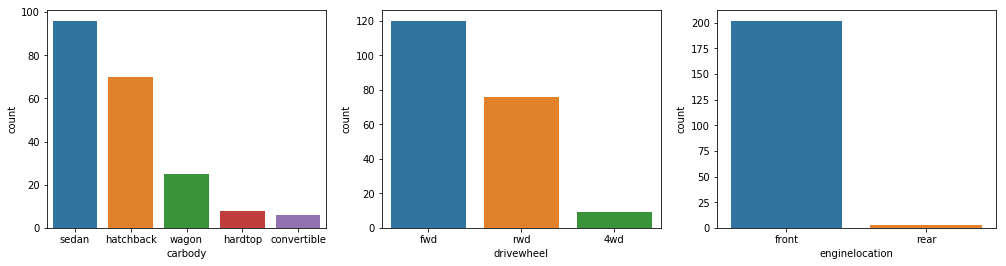

In [12]:
categorical_barPlot(carPrice, ['carbody','drivewheel','enginelocation'])

### <font color = violet> Insights:
- Most of the cars has
    - CarBody: sedan 
    - Drivewheel: fwd
    - Engine Location: front
- Engine Location has very few data points for rear, hence it has less predictive power
 </font>

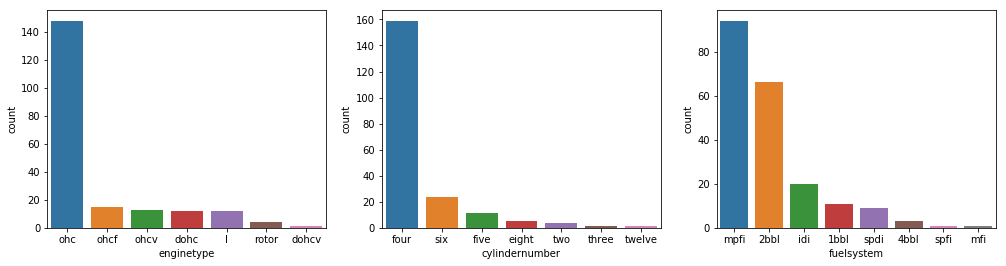

In [13]:
categorical_barPlot(carPrice, ['enginetype','cylindernumber','fuelsystem'])

### <font color = violet> Insights:
Most of the cars has
    - enginetype: ohc 
    - cylindernumber: four
    - fuelsystem: mpfi

- mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
 </font>

## Univariate Analysis
- Quantitative Variables

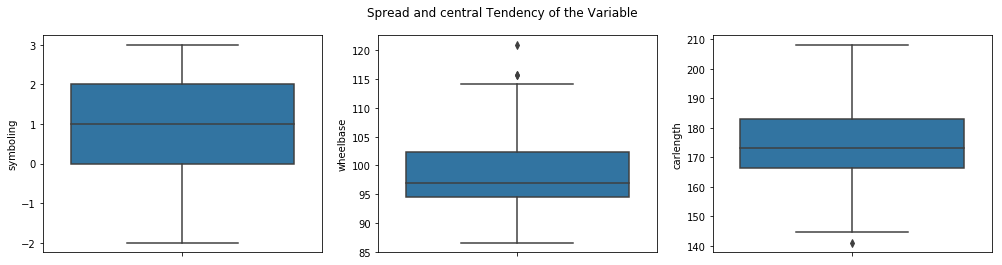

In [14]:
quantitative_boxplot(carPrice,['symboling','wheelbase','carlength'])

### <font color = violet> Insights: 
    - There are no outliers in the symboling,wheelbase,carlength

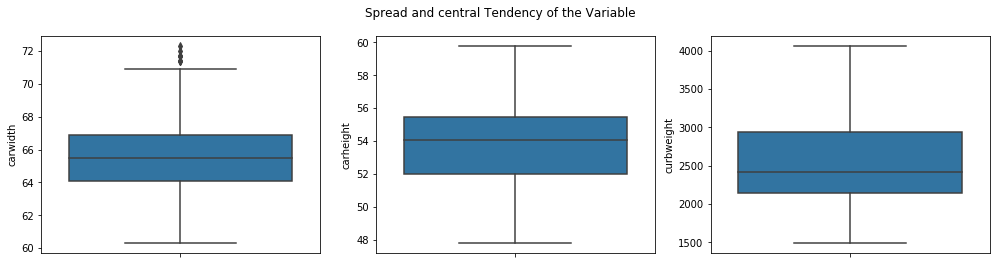

In [15]:
quantitative_boxplot(carPrice,['carwidth','carheight','curbweight'])

### <font color = violet> Insights:
    - There are no outliers in the 'carwidth','carheight','curbweight'

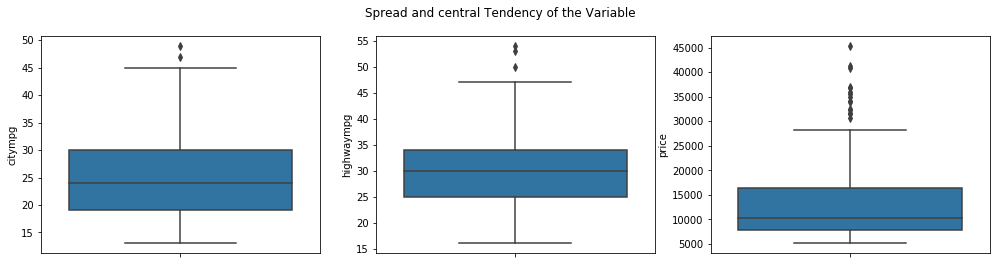

In [16]:
quantitative_boxplot(carPrice,['citympg','highwaympg','price'])

### <font color = violet> Insights:
    - We have outliers in Price
   
<font color = red>- These outliers needs to be handled </font>

- To Get better understanding of Price variation
    - perform segmented Univariate analysis 

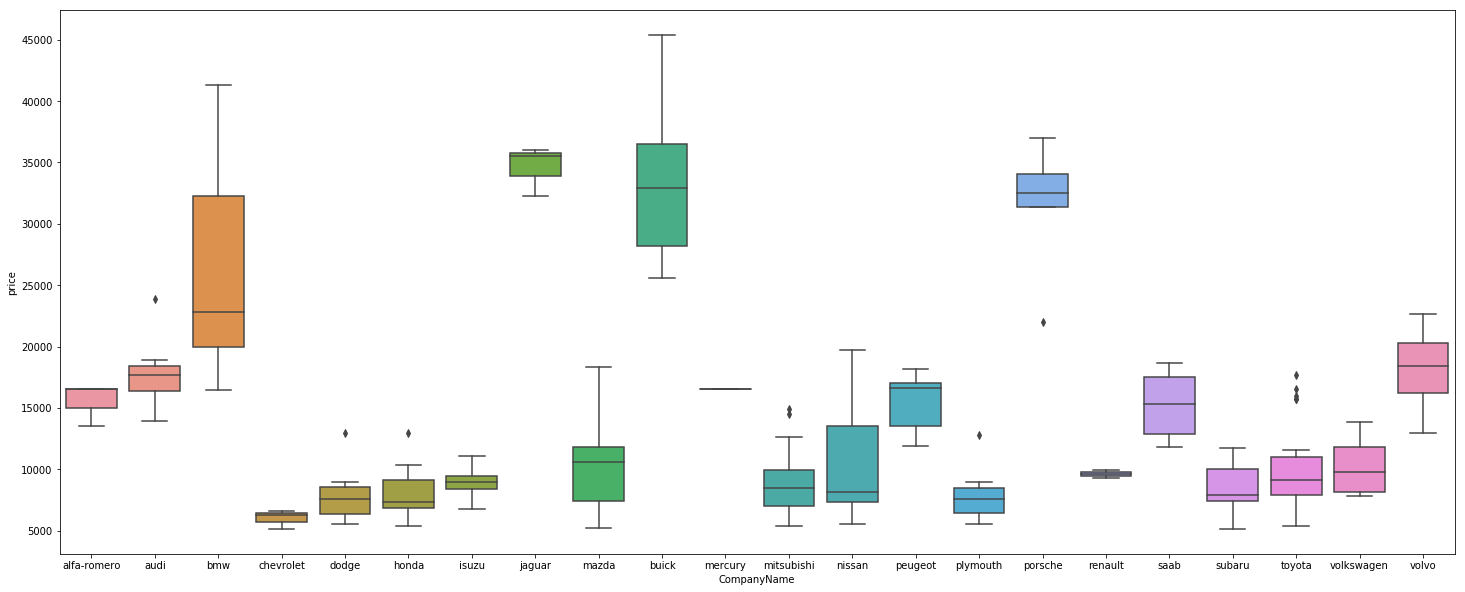

In [17]:
plt.figure(figsize = (25,10))
sns.boxplot(x = 'CompanyName', y = 'price',data = carPrice)
plt.show()

### <font color = violet> Insights: 
    - The outliers present in Price is due to the presence of high Model cars(Premium Sector)
    - Jaguar and Buick seem to have highest average price.
</font>

<font color = red> - As per business understanding, These outliers are expected.
<font color = red> - Create a derived column as carRange and will use the same for analysis

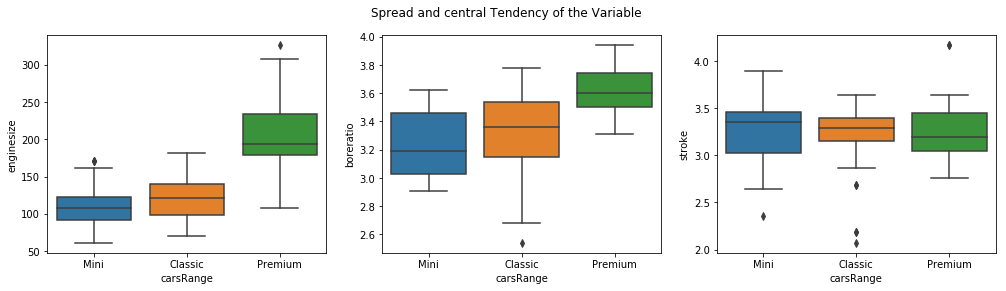

In [18]:
#Binning the Car Companies based on avg prices of each Company.
carPrice['price'] = carPrice['price'].astype('int')
df = carPrice.copy()

table = df.groupby(['CompanyName'])['price'].mean()
df = df.merge(table.reset_index(), how='left',on='CompanyName')

carPrice['carsRange'] = pd.cut(df['price_y'],[0,10000,20000,40000],right=False,labels=['Mini','Classic','Premium'])

quantitative_boxplot(carPrice,['enginesize','boreratio','stroke'], diff= 'carsRange')

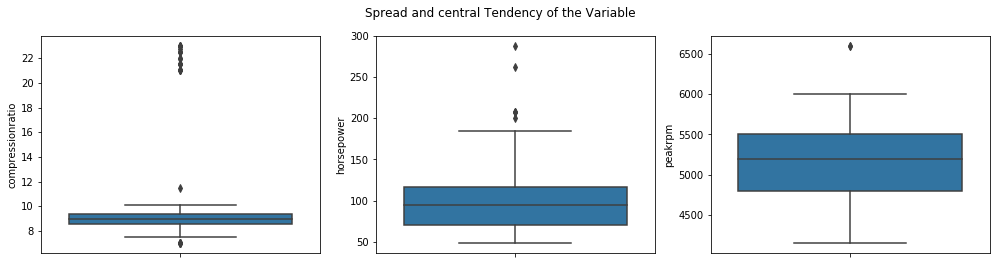

In [19]:
quantitative_boxplot(carPrice,['compressionratio','horsepower','peakrpm'])

### <font color = violet> Insights:
    - We have outliers in compression ratio</font>
<font color = red>- As per business understanding, Assumed Compressionratio may change based on the FuelType, Hence ploting it seperately </font>

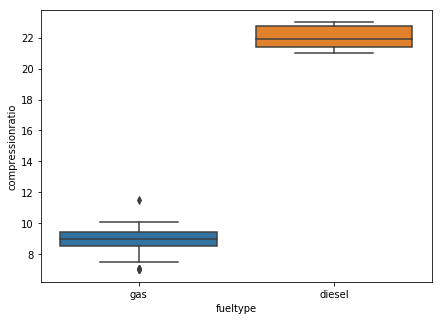

In [20]:
plt.figure(figsize = (7,5))
sns.boxplot(data =carPrice, y='compressionratio', x='fueltype')
plt.show()

### <font color = violet> Insights:
    - Outliers are acceptable

# Bivariate / Multivariate Analysis

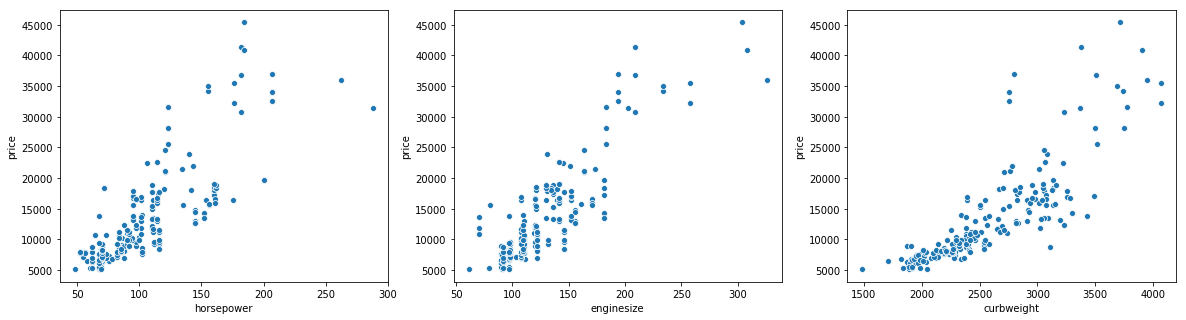

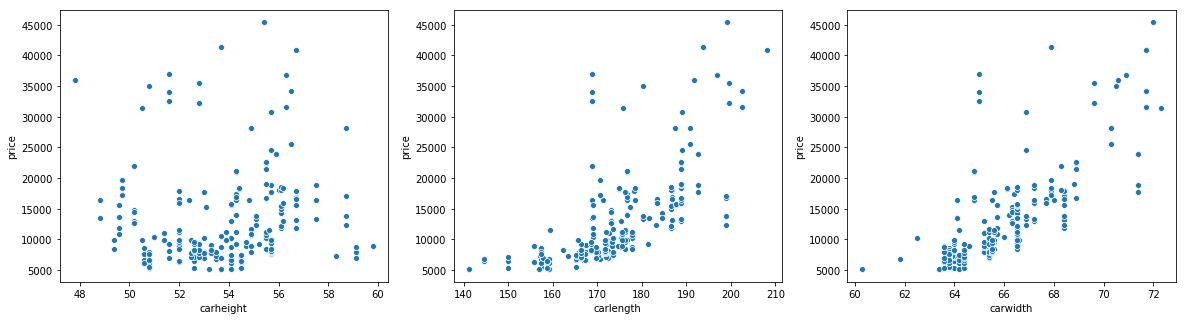

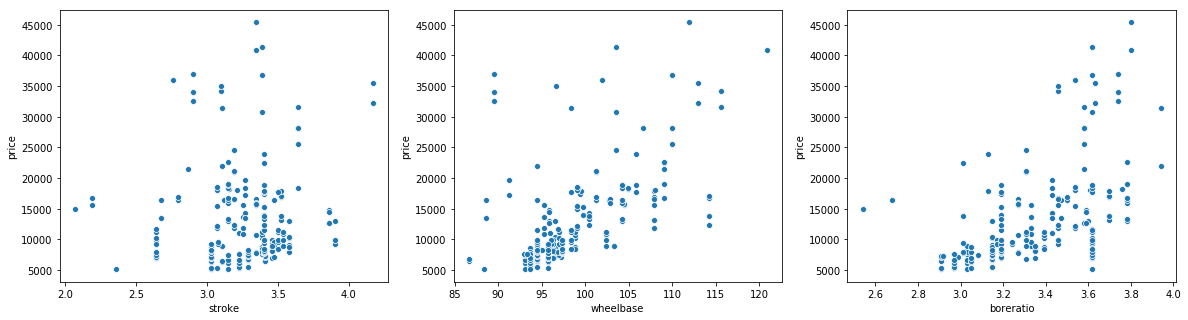

In [21]:
# Identify the correlation between the price and other variables
bi_ScatterPlot(carPrice,['horsepower','enginesize','curbweight'])
bi_ScatterPlot(carPrice,['carheight','carlength','carwidth'])
bi_ScatterPlot(carPrice,['stroke','wheelbase','boreratio'])

 ### <font color = violet> Insights: 
Positively correlated with Price
    - HorsePower 
    - Engine Size
    - curbweight
    - carheight
    - carlength
    - carwidth
    - stroke
    - wheelbase
    - boreratio

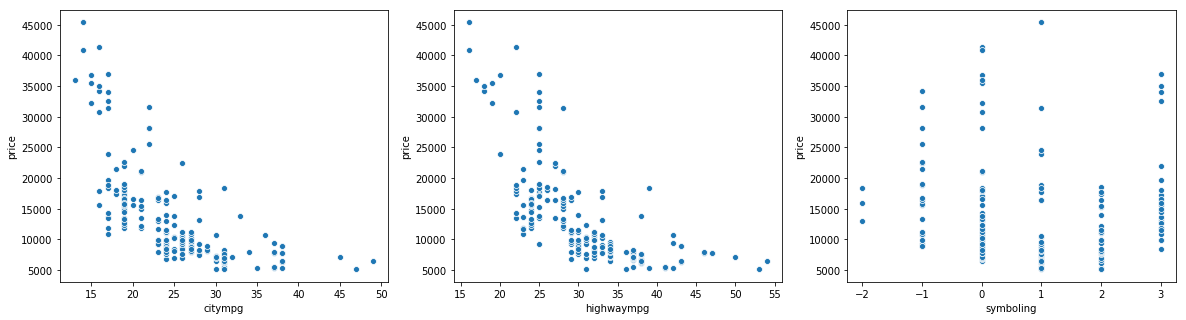

In [22]:
# Correlation with price
bi_ScatterPlot(carPrice,['citympg','highwaympg','symboling'])

<font color = red>Correlated with Price in opposite direction
    - Citympg
    - Highwaympg

## Derived Metrics

- CarRange (already created)
- FuelEconomy


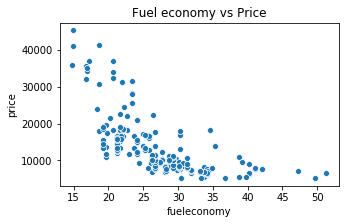

In [23]:
#Derived Column for Fuel economy
carPrice['fueleconomy'] = (0.55 * carPrice['citympg']) + (0.45 * carPrice['highwaympg'])

plt.figure(figsize=(5,3))
plt.title('Fuel economy vs Price')
sns.scatterplot(x=carPrice['fueleconomy'],y=carPrice['price'])

plt.show()

### <font color = violet> Insights:
- fueleconomy has an obvious negative correlation with price and is significant.


In [24]:
#List of Categorical values
list_category = carPrice.select_dtypes(['object','category'])
list_category.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'carsRange'],
      dtype='object')

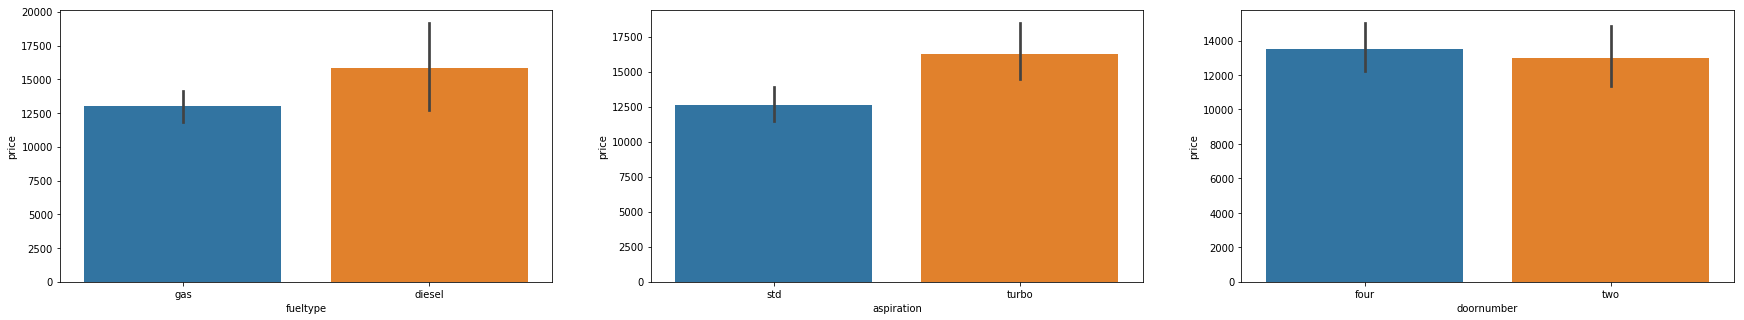

In [25]:
bi_categorical_barPlot(carPrice,['fueltype', 'aspiration', 'doornumber'])

### <font color = violet> Insights:
    - FuelType: Diesel vehicle's price are higher than gas
    - Aspiration as turbo are higher in price
    - Doornumber doesn't make much difference

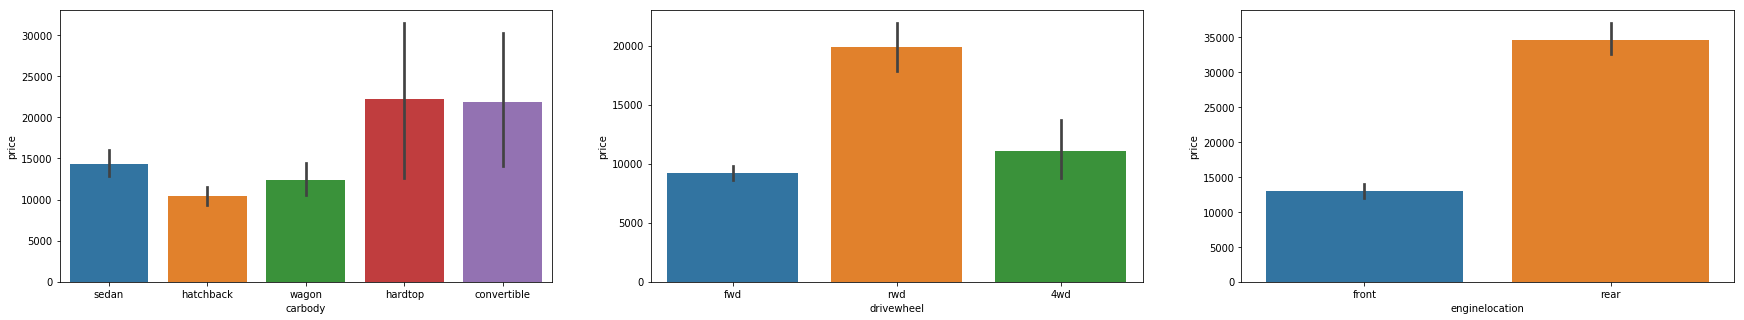

In [26]:
bi_categorical_barPlot(carPrice,['carbody', 'drivewheel','enginelocation'])

### <font color = violet> Insights:
    - CarBody: Hardtop and convertible cars are costly
    - Drivewheel: rwd has higher price than fwd and 4wd
    - EngineLocation: Surprisingly rear engine are higher in price

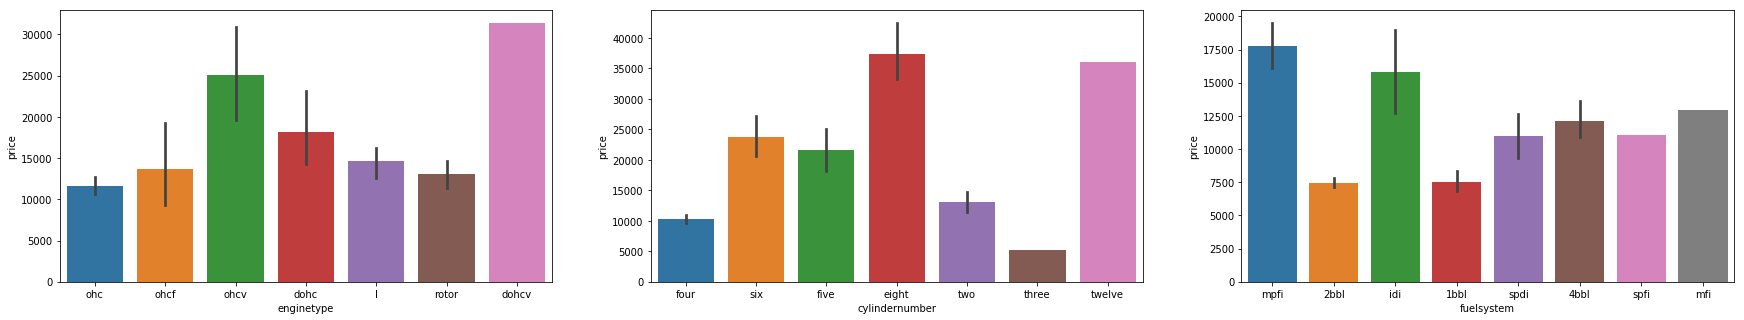

In [27]:
bi_categorical_barPlot(carPrice,['enginetype', 'cylindernumber', 'fuelsystem'])

### <font color = violet> Insights:
    - engineType: dohc engines are costly, as per the univariate analysis we have very few vehicle using this engineType
    - Number of Cylinder: Price increase with the increase in number of cylinder
    - FuelSystem: mpfi system is premium vehicles

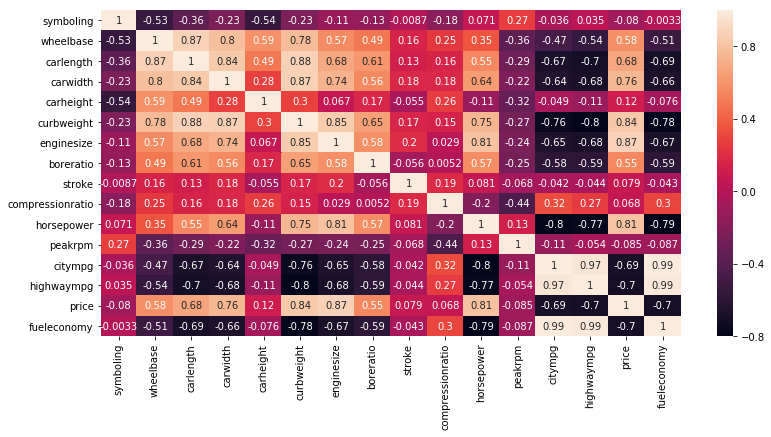

In [28]:
# To Find Correlation between the predictor and response
plt.figure(figsize = (13,6))
sns.heatmap(carPrice.corr(), annot = True)
plt.show()

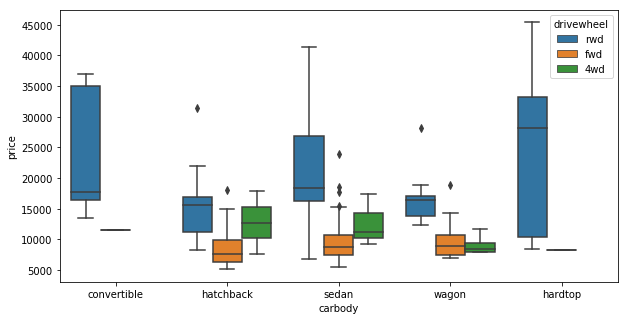

In [29]:
# MultiVariate

# sedan, carLenth
plt.figure(figsize = (10,5))
sns.boxplot(x ='carbody', y='price',hue = 'drivewheel',data = carPrice)
plt.show()

### <font color = violet> Insights:
    - High end cars body type(convertible and hardtop)  prefer only drive wheel type as rwd(Rear Drive Wheel)

### As per the above analysis below are the important variables to predict Price of the cars

- Quantitative Variables
    - EngineSize
    - HorsePower
    - CurbWeight
    - CarWidth
    - CarLength
    - BoreRatio
    - WheelBase
    - FuelEconomy
- Categorical Variables
    - FuelType
    - Aspiration
    - CylindersNumber
    - CarBody
    - Drivewheel
    - EngineType
    - CarRange

# Creating Dummies for categorical variables

In [30]:
carPrice_lr = carPrice[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight',
            'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower','fueleconomy',
            'carlength','carwidth', 'carsRange']].copy()

In [31]:
# Defining function to get dummies and drop columns
def getDummies(x,df):
    df[x] = x + "_" + df[x].astype(str)
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [32]:
carPrice_lr = getDummies('fueltype',carPrice_lr)
carPrice_lr = getDummies('aspiration',carPrice_lr)
carPrice_lr = getDummies('carbody',carPrice_lr)
carPrice_lr = getDummies('drivewheel',carPrice_lr)
carPrice_lr = getDummies('enginetype',carPrice_lr)
carPrice_lr = getDummies('cylindernumber',carPrice_lr)
carPrice_lr = getDummies('carsRange',carPrice_lr)

## Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [34]:
np.random.seed(0)
df_train, df_test = train_test_split(carPrice_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features
    - It is extremely important to rescale the variables so that they have a comparable scale.

In [35]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']

df_train.loc[:,num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\Vidhya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Vidhya\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsRange_Mini,carsRange_Premium
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,1,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,1,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,0,0


In [36]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsRange_Mini,carsRange_Premium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.468531,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.500763,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


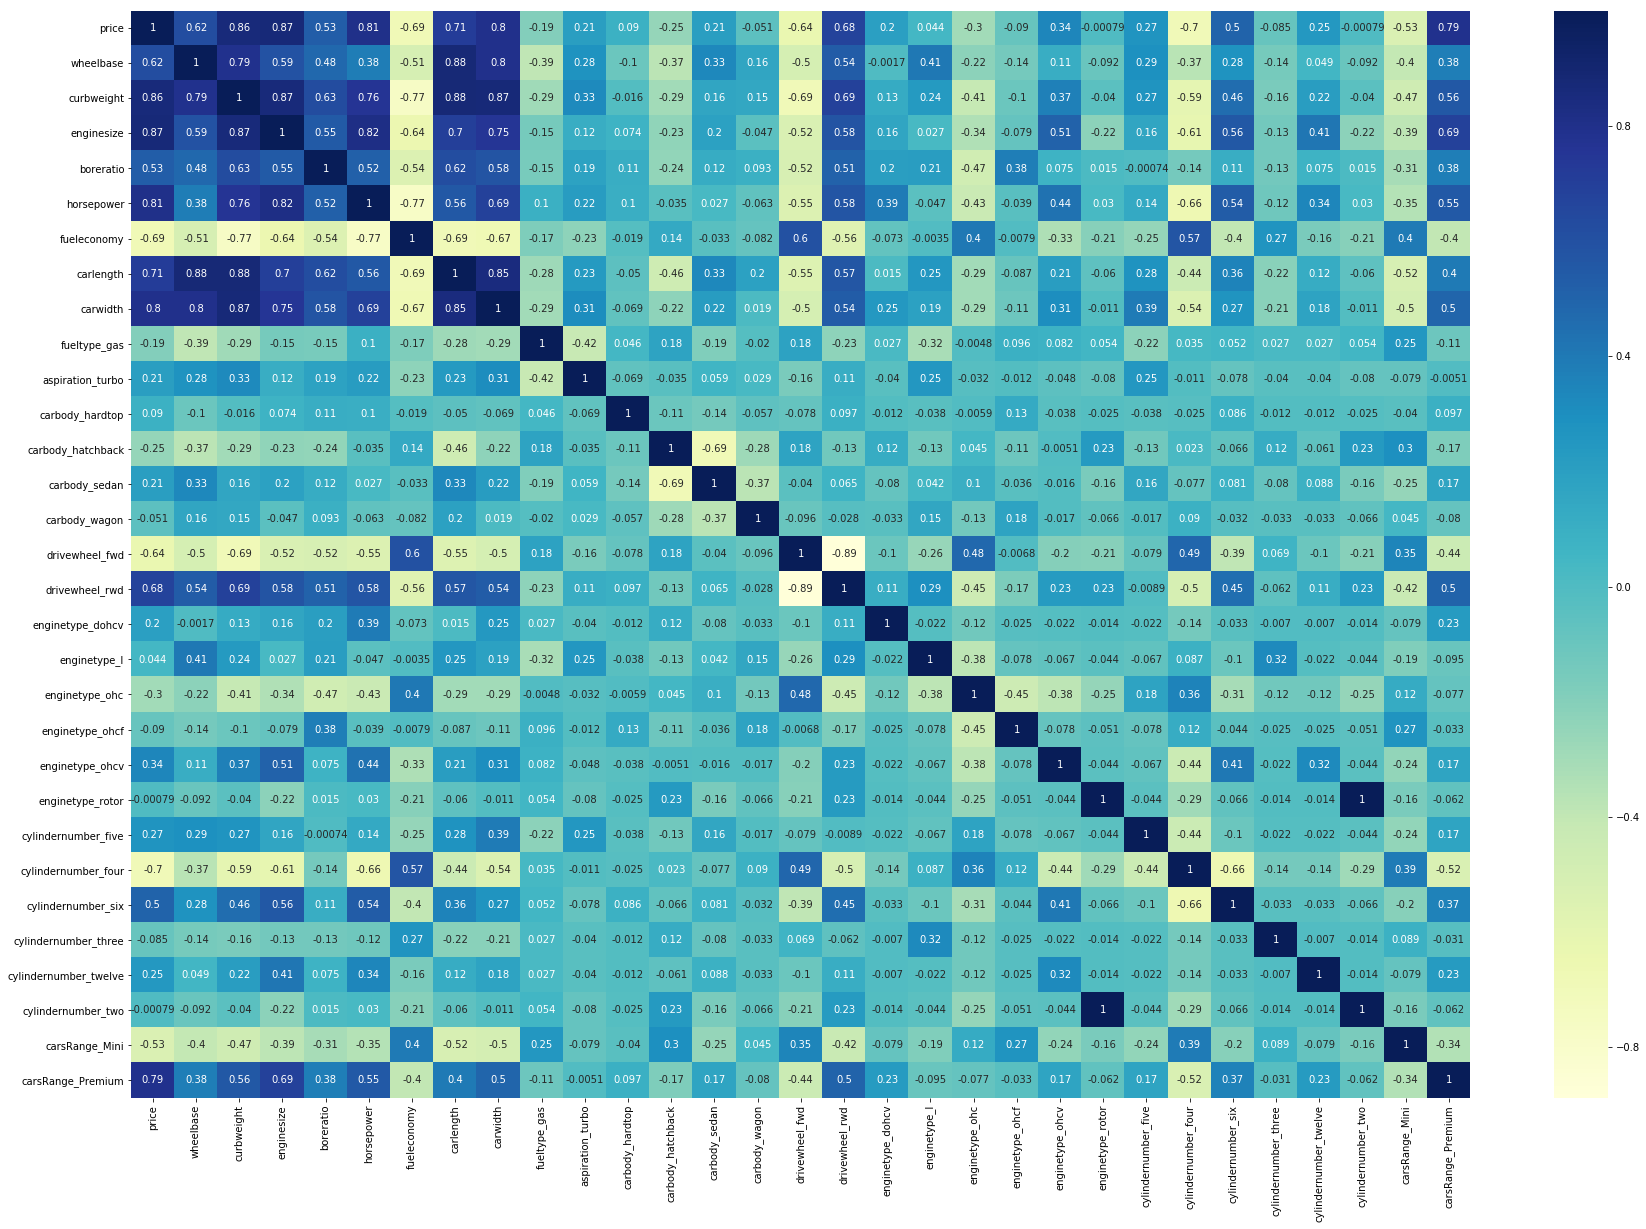

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True,cmap="YlGnBu")
plt.show()

 ### <font color = violet> Insights: 
Positively correlated with Price
    - HorsePower, Engine Size, curbweight,
    - carheight, carlength, carwidth, stroke, wheelbase, boreratio

### Dividing X and Y sets for the model building

In [38]:
X_train = df_train
y_train = df_train.pop('price')

## Building a linear model

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_))).sort_values(by = 2).head(10)

,0,1,2
29,carsRange_Premium,True,1
1,curbweight,True,1
26,cylindernumber_twelve,True,1
16,enginetype_dohcv,True,1
4,horsepower,True,1
5,fueleconomy,True,1
13,carbody_wagon,True,1
7,carwidth,True,1
12,carbody_sedan,True,1
11,carbody_hatchback,True,1


In [40]:
high_cor_col = X_train.columns[rfe.support_]
high_cor_col

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'carsRange_Premium'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'enginesize', 'boreratio', 'carlength', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_two', 'carsRange_Mini'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_train columns for statsModel
X_train_stats = X_train[high_cor_col]

# Adding a constant variable 
X_train_stats = sm.add_constant(X_train_stats)

C:\Users\Vidhya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
# UDF Calculate the VIFs for the new model
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Model 1:

In [44]:
# Running the linear model
lm_stats = sm.OLS(y_train,X_train_stats).fit() 

#Let's see the summary of our linear model
print(lm_stats.summary())

vif_calc(X_train_stats)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.29e-70
Time:                        23:05:38   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

,Features,VIF
0,const,71.51
1,curbweight,8.38
6,carbody_sedan,6.18
2,horsepower,5.94
5,carbody_hatchback,5.68
4,carwidth,5.19
3,fueleconomy,3.74
7,carbody_wagon,3.62
8,enginetype_dohcv,1.73
10,carsRange_Premium,1.68


 ### <font color = violet> Insights: 
<font color = red > - cylindernumber_twelve has high p value, hence we can drop it

In [45]:
X_train_stats = X_train_stats.drop('cylindernumber_twelve',axis = 1)

# Model 2:

In [46]:
# Running the linear model
lm_stats = sm.OLS(y_train,X_train_stats).fit() 

#Let's see the summary of our linear model
print(lm_stats.summary())

vif_calc(X_train_stats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.25e-71
Time:                        23:05:39   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0764      0.04

,Features,VIF
0,const,67.23
1,curbweight,8.33
6,carbody_sedan,6.13
5,carbody_hatchback,5.67
4,carwidth,5.19
2,horsepower,5.06
7,carbody_wagon,3.58
3,fueleconomy,3.56
9,carsRange_Premium,1.68
8,enginetype_dohcv,1.62


### <font color = violet> Insights: 
<font color = red > - Fuel Economy has high p value, hence we can drop it

In [47]:
X_train_stats = X_train_stats.drop('fueleconomy', axis = 1)

# Model 3:

In [48]:
# Running the linear model
lm_stats = sm.OLS(y_train,X_train_stats).fit() 

#Let's see the summary of our linear model
print(lm_stats.summary())

vif_calc(X_train_stats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           7.85e-72
Time:                        23:05:39   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0305      0.02

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,carbody_sedan,6.07
4,carbody_hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,carbody_wagon,3.58
8,carsRange_Premium,1.63
7,enginetype_dohcv,1.46


### <font color = violet> Insights: 
<font color = red > - curbweight has high VIF value, hence we can drop it

In [49]:
X_train_stats = X_train_stats.drop('curbweight', axis = 1)

In [50]:
# Running the linear model
lm_stats = sm.OLS(y_train,X_train_stats).fit() 

#Let's see the summary of our linear model
print(lm_stats.summary())

vif_calc(X_train_stats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.70e-70
Time:                        23:05:39   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0319      0.02

,Features,VIF
0,const,26.89
4,carbody_sedan,6.06
3,carbody_hatchback,5.54
5,carbody_wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,carsRange_Premium,1.56
6,enginetype_dohcv,1.21


### <font color = violet> Insights: 
<font color = red > - Sedan has high VIF value, hence we can drop it

In [51]:
X_train_stats = X_train_stats.drop('carbody_sedan', axis = 1)

In [52]:
# Running the linear model
lm_stats = sm.OLS(y_train,X_train_stats).fit() 

#Let's see the summary of our linear model
print(lm_stats.summary())

vif_calc(X_train_stats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.68e-69
Time:                        23:05:39   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0934      0.01

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,carsRange_Premium,1.55
3,carbody_hatchback,1.23
5,enginetype_dohcv,1.21
4,carbody_wagon,1.11


### <font color = violet> Insights: 
<font color = red > -  wagon has high p value, hence we can drop it

In [53]:
X_train_stats = X_train_stats.drop('carbody_wagon', axis = 1)

In [54]:
# Running the linear model
lm_stats = sm.OLS(y_train,X_train_stats).fit() 

#Let's see the summary of our linear model
print(lm_stats.summary())

vif_calc(X_train_stats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.57e-70
Time:                        23:05:40   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,carsRange_Premium,1.53
4,enginetype_dohcv,1.21
3,carbody_hatchback,1.13


### <font color = violet> Insights:
    - As per the univariate analysis, enginetype_dohcv has very few data points
    - By dropping we can improve the higher stats values

In [55]:
X_train_stats = X_train_stats.drop('enginetype_dohcv', axis = 1)

In [56]:
# Running the linear model
lm_stats = sm.OLS(y_train,X_train_stats).fit() 

#Let's see the summary of our linear model
print(lm_stats.summary())

vif_calc(X_train_stats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.04e-67
Time:                        23:05:40   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0824      0.01

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,carsRange_Premium,1.53
3,carbody_hatchback,1.10


### <font color = violet> Insights: 
- All the p value are less than 0.05
- Vif values are less than 5
- we have good R2 value and adjusted R2
- F-statistic and prob F-statistic are also good

###  <font color = green> Hence the line is not fit by chance and all the features significant

## Residual Analysis of the train data

In [57]:
y_train_pred = lm_stats.predict(X_train_stats)

res = (y_train - y_train_pred)
res.head()

122   -0.000826
125   -0.126709
166    0.006564
1      0.156041
199    0.027970
dtype: float64

Text(0.5, 0, 'Errors')

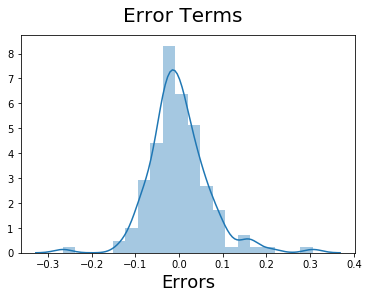

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

 ### <font color = violet> Insights: 
- Error terms are normally distributed with mean 0 

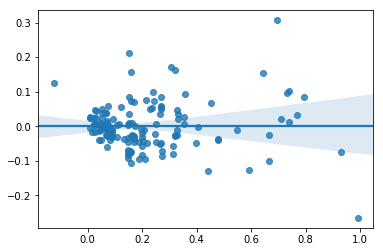

In [59]:
sns.regplot(y_train_pred, res)
plt.show()

 ### <font color = violet> Insights: 
- Error terms are independent of each other

# Making Predictions Using the Final Model


In [60]:
df_test.loc[:,num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

C:\Users\Vidhya\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsRange_Mini,carsRange_Premium
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000
mean,0.239439,0.437764,0.428470,0.265673,0.556580,0.248858,0.344661,0.559481,0.480376,0.887097,...,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.451613,0.112903
std,0.233076,0.212861,0.179488,0.162820,0.228484,0.163376,0.175037,0.189947,0.165440,0.319058,...,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.501716,0.319058
min,0.007763,0.000000,0.128394,0.067925,-0.111111,0.016667,0.002743,0.056911,0.183333,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.092342,0.313793,0.305275,0.177358,0.404762,0.107292,0.192387,0.459350,0.358333,1.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.158991,0.387931,0.406129,0.226415,0.563492,0.218750,0.326475,0.547967,0.441667,1.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,0.317243,0.570690,0.564876,0.316038,0.746032,0.295833,0.451303,0.719919,0.516667,1.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000
max,1.112855,1.182759,0.935609,0.932075,0.888889,0.662500,0.747599,1.089431,0.975000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


#### Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('price')
X_test = df_test

In [62]:
# Adding constant variable to test dataframe
X_test_stats = X_test.loc[:,['horsepower','carsRange_Premium','carbody_hatchback','carwidth']]
X_test_stats = sm.add_constant(X_test_stats)

# Making predictions using model
y_test_pred = lm_stats.predict(X_test_stats)

res = (y_test - y_test_pred)
res.head()

C:\Users\Vidhya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


160    0.019005
186   -0.013207
59     0.016408
165   -0.005619
140    0.065140
dtype: float64

Text(0, 0.5, 'y_pred')

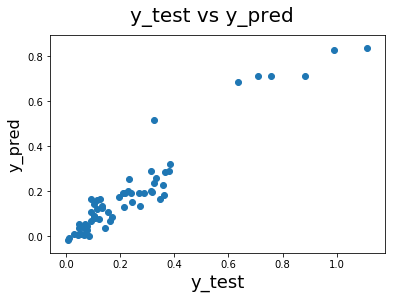

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  


In [64]:
#Let's see the summary of our linear model
print(lm_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.04e-67
Time:                        23:05:42   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0824      0.01

### <font color = violet> Insights: 
 - R-squared and Adjusted R-squared - 0.899 and 0.896 - 90% variance explained.
 - F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fit is significant and explained 90%  variance is just not by chance.
 - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

###  <font color = green> Hence the line is not fit by chance and all the features significant
    
Driven Variables are:

- HorsePower
- CarWidth
- CarBodyHatchback
- carsRange_Premium

We can see that the equation of our best fitted line is:

$ price = 0.4402  \times  horsepower + 0.3957  \times  carwidth + (-0.0414) \times carbodyhatchback + 0.2794 \times carsRangePremium + (-0.0824)$ 




In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8678933534611605